In [6]:
import pathlib
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from src import utils, constants
import IPython.display as ipd
%matplotlib inline
plt.style.use("ggplot")
pl.Config.set_tbl_cols(50)
pl.Config.set_tbl_rows(50)

oof = pl.read_parquet(constants.OUTPUT_DIR / "exp000" / "oof.parquet")
ipd.display(oof)

Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,prompt,labels,preds,folds
i64,i64,str,str,i64,i64,i64,str,i32,f64,f64
0,25,"""3-season skirt!""","""Adorable, well-made skirt! lin…",5,1,4,"""3-season skirt! [TITLE] Adorab…",1,0.997199,4.0
0,39,"""Very cute""","""Love the asymmetrical hem. wai…",5,1,0,"""Very cute [TITLE] Love the asy…",1,0.995318,4.0
0,42,"""Beautiful! fruns small for typ…","""I love this skirt! i wasn't su…",5,1,5,"""Beautiful! fruns small for typ…",1,0.999532,3.0
0,45,"""""","""I was really pleased with this…",5,1,9,""" [TITLE] I was really pleased …",1,0.997603,0.0
0,57,"""Unique, pretty asymmetric skir…","""I saw this skirt in retailer s…",5,1,1,"""Unique, pretty asymmetric skir…",1,0.996371,1.0
0,62,"""Beautiful day to evening skirt""","""A lovely skirt and i'm so glad…",4,1,0,"""Beautiful day to evening skirt…",1,0.99651,1.0
0,73,"""Too small""","""I usually wear a 6 and ordered…",2,0,7,"""Too small [TITLE] I usually we…",0,0.129348,0.0
1,26,"""Love it so much!""","""This jumpsuit is so, so cute. …",4,1,0,"""Love it so much! [TITLE] This …",1,0.99777,4.0
1,30,"""Comfy but...""","""The top is huge! i wear an xs …",3,1,0,"""Comfy but... [TITLE] The top i…",1,0.110759,3.0


In [9]:
oof = oof.with_columns(
    err=(pl.col("labels") - pl.col("preds")).abs(),
).sort(by="err", descending=True)
ipd.display(oof.head(50))

Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,prompt,labels,preds,folds,err
i64,i64,str,str,i64,i64,i64,str,i32,f64,f64,f64
211,33,"""Love it!""","""I didn't realize how much i wo…",5,0,0,"""Love it! [TITLE] I didn't real…",0,0.99952,3.0,0.99952
62,44,"""Sale find""","""I bought this in navy and love…",3,0,0,"""Sale find [TITLE] I bought thi…",0,0.999389,3.0,0.999389
166,67,"""Image does not do it justice""","""This is the cutest sweater. i …",5,0,16,"""Image does not do it justice […",0,0.999313,3.0,0.999313
148,32,"""Nice but stiff""","""This dress is very pretty in p…",3,0,0,"""Nice but stiff [TITLE] This dr…",0,0.998299,3.0,0.998299
158,59,"""Love the fit, watch when you w…","""""",3,0,1,"""Love the fit, watch when you w…",0,0.998028,2.0,0.998028
226,58,"""""","""I personally love this romper.…",3,0,1,""" [TITLE] I personally love thi…",0,0.997783,3.0,0.997783
80,52,"""Love this top!""","""This top is one of my retailer…",5,0,2,"""Love this top! [TITLE] This to…",0,0.997518,0.0,0.997518
164,33,"""""","""I got this dress in the mail t…",2,0,4,""" [TITLE] I got this dress in t…",0,0.997484,3.0,0.997484
49,47,"""Comfy""","""This shirt is like the best wo…",5,0,1,"""Comfy [TITLE] This shirt is li…",0,0.997199,0.0,0.997199


In [10]:
miss = oof.filter(pl.col("err") > 0.5)
ipd.display(miss)

Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,prompt,labels,preds,folds,err
i64,i64,str,str,i64,i64,i64,str,i32,f64,f64,f64
211,33,"""Love it!""","""I didn't realize how much i wo…",5,0,0,"""Love it! [TITLE] I didn't real…",0,0.99952,3.0,0.99952
62,44,"""Sale find""","""I bought this in navy and love…",3,0,0,"""Sale find [TITLE] I bought thi…",0,0.999389,3.0,0.999389
166,67,"""Image does not do it justice""","""This is the cutest sweater. i …",5,0,16,"""Image does not do it justice […",0,0.999313,3.0,0.999313
148,32,"""Nice but stiff""","""This dress is very pretty in p…",3,0,0,"""Nice but stiff [TITLE] This dr…",0,0.998299,3.0,0.998299
158,59,"""Love the fit, watch when you w…","""""",3,0,1,"""Love the fit, watch when you w…",0,0.998028,2.0,0.998028
226,58,"""""","""I personally love this romper.…",3,0,1,""" [TITLE] I personally love thi…",0,0.997783,3.0,0.997783
80,52,"""Love this top!""","""This top is one of my retailer…",5,0,2,"""Love this top! [TITLE] This to…",0,0.997518,0.0,0.997518
164,33,"""""","""I got this dress in the mail t…",2,0,4,""" [TITLE] I got this dress in t…",0,0.997484,3.0,0.997484
49,47,"""Comfy""","""This shirt is like the best wo…",5,0,1,"""Comfy [TITLE] This shirt is li…",0,0.997199,0.0,0.997199


In [14]:
miss.group_by("Clothing ID").len().sort("len", descending=True)

Clothing ID,len
i64,u32
148,32
226,24
65,23
94,19
83,17
164,16
56,14
212,13
80,13


In [16]:
target_id = 148
ipd.display(oof.filter(pl.col("Clothing ID") == target_id))
ipd.display(miss.filter(pl.col("Clothing ID") == target_id))

Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,prompt,labels,preds,folds,err
i64,i64,str,str,i64,i64,i64,str,i32,f64,f64,f64
148,32,"""Nice but stiff""","""This dress is very pretty in p…",3,0,0,"""Nice but stiff [TITLE] This dr…",0,0.998299,3.0,0.998299
148,42,"""Great dress but cut too low""","""Dress caught my eye on the rac…",3,0,1,"""Great dress but cut too low [T…",0,0.992184,2.0,0.992184
148,25,"""Great quality, but not for my …","""This dress is well made and of…",3,0,0,"""Great quality, but not for my …",0,0.991922,2.0,0.991922
148,64,"""Huge!""","""""",3,1,0,"""Huge! [TITLE] """,1,0.011486,3.0,0.988514
148,37,"""Comfortable and pretty""","""I have mixed feelings about th…",3,0,2,"""Comfortable and pretty [TITLE]…",0,0.986111,2.0,0.986111
148,53,"""""","""This is a review of customer s…",5,1,1,""" [TITLE] This is a review of c…",1,0.014448,3.0,0.985552
148,25,"""Nice, but not for me.""","""After eyeing this product onli…",3,0,2,"""Nice, but not for me. [TITLE] …",0,0.97539,2.0,0.97539
148,24,"""""","""""",1,0,1,""" [TITLE] """,0,0.974941,0.0,0.974941
148,25,"""Beautiful design""","""""",3,0,0,"""Beautiful design [TITLE] """,0,0.969613,4.0,0.969613


Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,prompt,labels,preds,folds,err
i64,i64,str,str,i64,i64,i64,str,i32,f64,f64,f64
148,32,"""Nice but stiff""","""This dress is very pretty in p…",3,0,0,"""Nice but stiff [TITLE] This dr…",0,0.998299,3.0,0.998299
148,42,"""Great dress but cut too low""","""Dress caught my eye on the rac…",3,0,1,"""Great dress but cut too low [T…",0,0.992184,2.0,0.992184
148,25,"""Great quality, but not for my …","""This dress is well made and of…",3,0,0,"""Great quality, but not for my …",0,0.991922,2.0,0.991922
148,64,"""Huge!""","""""",3,1,0,"""Huge! [TITLE] """,1,0.011486,3.0,0.988514
148,37,"""Comfortable and pretty""","""I have mixed feelings about th…",3,0,2,"""Comfortable and pretty [TITLE]…",0,0.986111,2.0,0.986111
148,53,"""""","""This is a review of customer s…",5,1,1,""" [TITLE] This is a review of c…",1,0.014448,3.0,0.985552
148,25,"""Nice, but not for me.""","""After eyeing this product onli…",3,0,2,"""Nice, but not for me. [TITLE] …",0,0.97539,2.0,0.97539
148,24,"""""","""""",1,0,1,""" [TITLE] """,0,0.974941,0.0,0.974941
148,25,"""Beautiful design""","""""",3,0,0,"""Beautiful design [TITLE] """,0,0.969613,4.0,0.969613


 *************************** 
Clthing ID:  [211]
Prompt:  ["Love it! [TITLE] I didn't realize how much i would love this. wore it to work the other day and got more compliments than i have in a very long time on an outfit! it's comfortable and easy and flattering. bought this totally on a whim and so glad i did!"]
labels:  [0]
Rating:  [5]
preds:  [0.9995197057723999]
Positive Feedback Count:  [0]
err:  [0.9995197057723999]
labels:  shape: (9, 2)
┌────────────┬──────────┐
│ statistic  ┆ value    │
│ ---        ┆ ---      │
│ str        ┆ f64      │
╞════════════╪══════════╡
│ count      ┆ 66.0     │
│ null_count ┆ 0.0      │
│ mean       ┆ 0.772727 │
│ std        ┆ 0.422282 │
│ min        ┆ 0.0      │
│ 25%        ┆ 1.0      │
│ 50%        ┆ 1.0      │
│ 75%        ┆ 1.0      │
│ max        ┆ 1.0      │
└────────────┴──────────┘


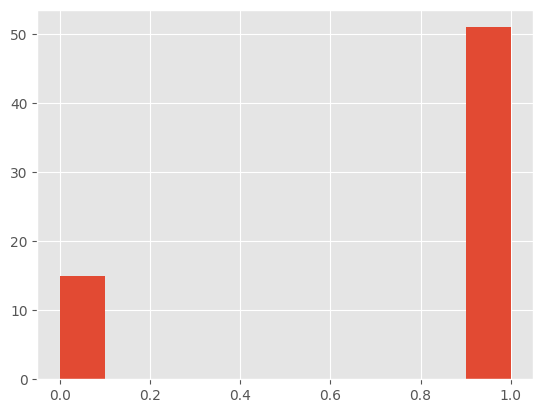

Rating:  shape: (9, 2)
┌────────────┬──────────┐
│ statistic  ┆ value    │
│ ---        ┆ ---      │
│ str        ┆ f64      │
╞════════════╪══════════╡
│ count      ┆ 66.0     │
│ null_count ┆ 0.0      │
│ mean       ┆ 4.0      │
│ std        ┆ 1.176697 │
│ min        ┆ 1.0      │
│ 25%        ┆ 3.0      │
│ 50%        ┆ 4.0      │
│ 75%        ┆ 5.0      │
│ max        ┆ 5.0      │
└────────────┴──────────┘


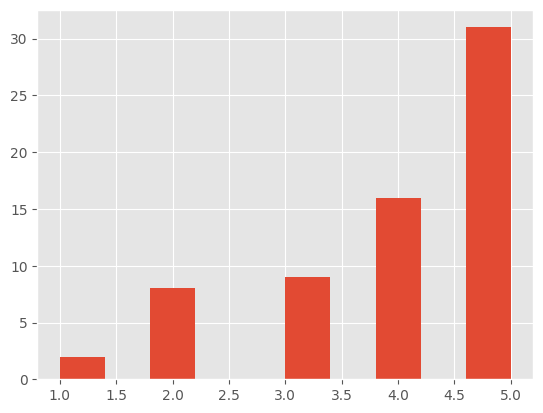

 *************************** 
Clthing ID:  [62]
Prompt:  ["Sale find [TITLE] I bought this in navy and love the multi textures and look. i'm happy it was on sale because it is so cute but i would not have paid full price on it. it runs small. i plan on wearing it for casual errand days."]
labels:  [0]
Rating:  [3]
preds:  [0.9993892908096313]
Positive Feedback Count:  [0]
err:  [0.9993892908096313]
labels:  shape: (9, 2)
┌────────────┬──────────┐
│ statistic  ┆ value    │
│ ---        ┆ ---      │
│ str        ┆ f64      │
╞════════════╪══════════╡
│ count      ┆ 147.0    │
│ null_count ┆ 0.0      │
│ mean       ┆ 0.829932 │
│ std        ┆ 0.376977 │
│ min        ┆ 0.0      │
│ 25%        ┆ 1.0      │
│ 50%        ┆ 1.0      │
│ 75%        ┆ 1.0      │
│ max        ┆ 1.0      │
└────────────┴──────────┘


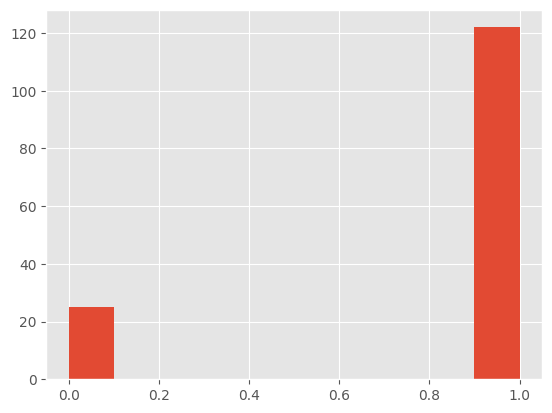

Rating:  shape: (9, 2)
┌────────────┬──────────┐
│ statistic  ┆ value    │
│ ---        ┆ ---      │
│ str        ┆ f64      │
╞════════════╪══════════╡
│ count      ┆ 147.0    │
│ null_count ┆ 0.0      │
│ mean       ┆ 4.129252 │
│ std        ┆ 1.130354 │
│ min        ┆ 1.0      │
│ 25%        ┆ 4.0      │
│ 50%        ┆ 5.0      │
│ 75%        ┆ 5.0      │
│ max        ┆ 5.0      │
└────────────┴──────────┘


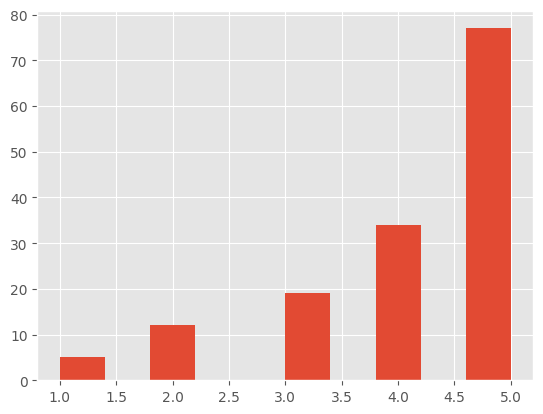

 *************************** 
Clthing ID:  [166]
Prompt:  ['Image does not do it justice [TITLE] This is the cutest sweater. i bought it today in black. i cannot wait to wear it. it is a lovely, distinctive knit & just the right weight to layer as shown with a white blouse or with a turtleneck. i tried both the xs and s; and i decided to go with the s as it still emphasized that i have waist, but i could layer it nicely. i am 5\'4", 130 lb. you can always count on angel of the north for great style.']
labels:  [0]
Rating:  [5]
preds:  [0.999313473701477]
Positive Feedback Count:  [16]
err:  [0.999313473701477]
labels:  shape: (9, 2)
┌────────────┬──────────┐
│ statistic  ┆ value    │
│ ---        ┆ ---      │
│ str        ┆ f64      │
╞════════════╪══════════╡
│ count      ┆ 193.0    │
│ null_count ┆ 0.0      │
│ mean       ┆ 0.834197 │
│ std        ┆ 0.372871 │
│ min        ┆ 0.0      │
│ 25%        ┆ 1.0      │
│ 50%        ┆ 1.0      │
│ 75%        ┆ 1.0      │
│ max        ┆ 1.0   

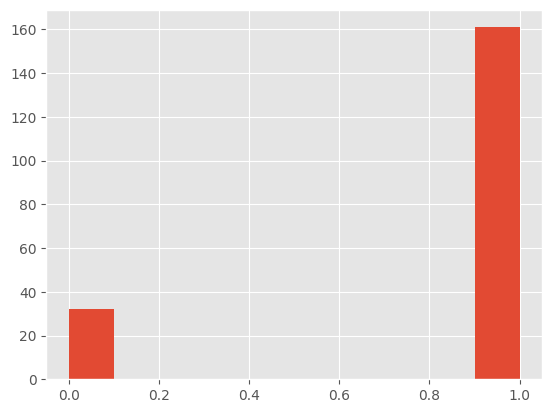

Rating:  shape: (9, 2)
┌────────────┬──────────┐
│ statistic  ┆ value    │
│ ---        ┆ ---      │
│ str        ┆ f64      │
╞════════════╪══════════╡
│ count      ┆ 193.0    │
│ null_count ┆ 0.0      │
│ mean       ┆ 4.290155 │
│ std        ┆ 1.074688 │
│ min        ┆ 1.0      │
│ 25%        ┆ 4.0      │
│ 50%        ┆ 5.0      │
│ 75%        ┆ 5.0      │
│ max        ┆ 5.0      │
└────────────┴──────────┘


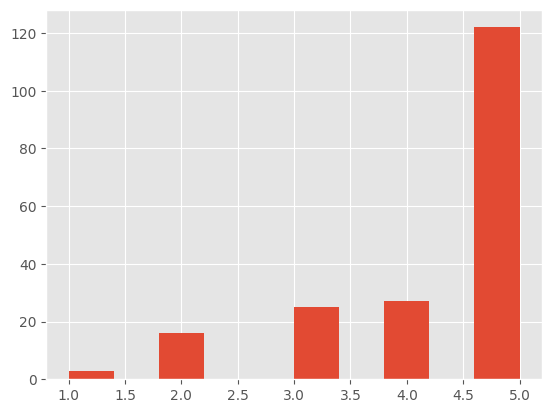

 *************************** 
Clthing ID:  [148]
Prompt:  ["Nice but stiff [TITLE] This dress is very pretty in person. it fits true to size and is very figure flattering. one other reviewer mentioned it is a bit low cut, but i think that can be resolved by wearing a cami underneath to cover cleavage. my only gripe with this dress is that it's a little rough and stiff feeling. i am really sensitive to that and only buy things that are velvety soft. it probably works for most people but not for me, so had to go back."]
labels:  [0]
Rating:  [3]
preds:  [0.9982993006706238]
Positive Feedback Count:  [0]
err:  [0.9982993006706238]
labels:  shape: (9, 2)
┌────────────┬──────────┐
│ statistic  ┆ value    │
│ ---        ┆ ---      │
│ str        ┆ f64      │
╞════════════╪══════════╡
│ count      ┆ 360.0    │
│ null_count ┆ 0.0      │
│ mean       ┆ 0.794444 │
│ std        ┆ 0.404669 │
│ min        ┆ 0.0      │
│ 25%        ┆ 1.0      │
│ 50%        ┆ 1.0      │
│ 75%        ┆ 1.0      │
│ m

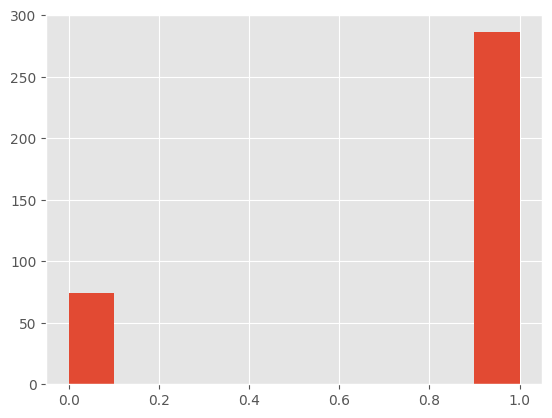

Rating:  shape: (9, 2)
┌────────────┬──────────┐
│ statistic  ┆ value    │
│ ---        ┆ ---      │
│ str        ┆ f64      │
╞════════════╪══════════╡
│ count      ┆ 360.0    │
│ null_count ┆ 0.0      │
│ mean       ┆ 4.080556 │
│ std        ┆ 1.135234 │
│ min        ┆ 1.0      │
│ 25%        ┆ 3.0      │
│ 50%        ┆ 4.0      │
│ 75%        ┆ 5.0      │
│ max        ┆ 5.0      │
└────────────┴──────────┘


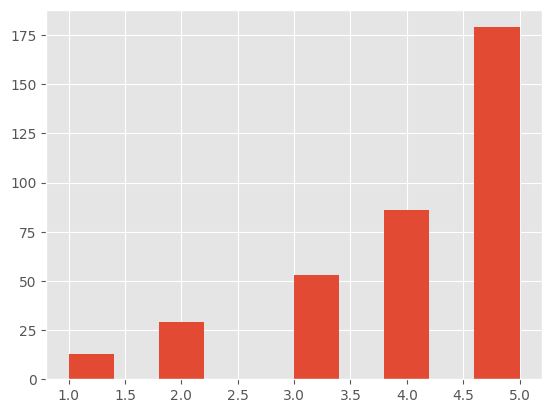

 *************************** 
Clthing ID:  [158]
Prompt:  ['Love the fit, watch when you wash them [TITLE] ']
labels:  [0]
Rating:  [3]
preds:  [0.9980276226997375]
Positive Feedback Count:  [1]
err:  [0.9980276226997375]
labels:  shape: (9, 2)
┌────────────┬──────────┐
│ statistic  ┆ value    │
│ ---        ┆ ---      │
│ str        ┆ f64      │
╞════════════╪══════════╡
│ count      ┆ 98.0     │
│ null_count ┆ 0.0      │
│ mean       ┆ 0.877551 │
│ std        ┆ 0.329489 │
│ min        ┆ 0.0      │
│ 25%        ┆ 1.0      │
│ 50%        ┆ 1.0      │
│ 75%        ┆ 1.0      │
│ max        ┆ 1.0      │
└────────────┴──────────┘


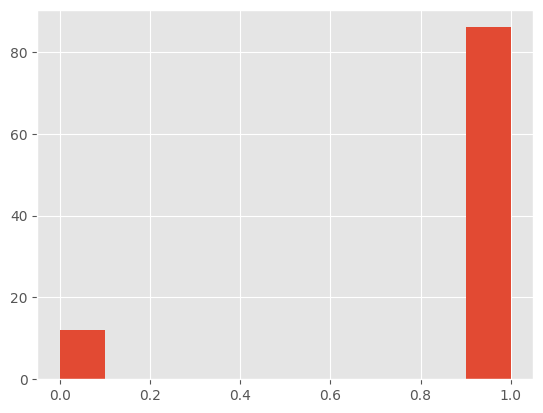

Rating:  shape: (9, 2)
┌────────────┬──────────┐
│ statistic  ┆ value    │
│ ---        ┆ ---      │
│ str        ┆ f64      │
╞════════════╪══════════╡
│ count      ┆ 98.0     │
│ null_count ┆ 0.0      │
│ mean       ┆ 4.326531 │
│ std        ┆ 1.137691 │
│ min        ┆ 1.0      │
│ 25%        ┆ 4.0      │
│ 50%        ┆ 5.0      │
│ 75%        ┆ 5.0      │
│ max        ┆ 5.0      │
└────────────┴──────────┘


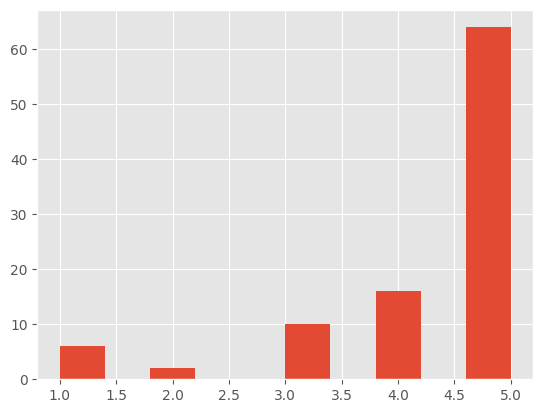

 *************************** 
Clthing ID:  [226]
Prompt:  [" [TITLE] I personally love this romper. there's a lot of fabric to it, so it feels lush and substantial. and the pockets! they're so roomy i actually couldn't find my phone for a hot second. the crotch of the legs (because, yes, this thing is actually pants) is very long and so i was very comfortable sitting.\r\n\r\nthe two things i don't love about this piece include the downfall of all rompers imo: not bathroom-break friendly. you basically have to disrobe. and since the legs are so long, you end up clingi"]
labels:  [0]
Rating:  [3]
preds:  [0.9977830052375793]
Positive Feedback Count:  [1]
err:  [0.9977830052375793]
labels:  shape: (9, 2)
┌────────────┬──────────┐
│ statistic  ┆ value    │
│ ---        ┆ ---      │
│ str        ┆ f64      │
╞════════════╪══════════╡
│ count      ┆ 480.0    │
│ null_count ┆ 0.0      │
│ mean       ┆ 0.808333 │
│ std        ┆ 0.394023 │
│ min        ┆ 0.0      │
│ 25%        ┆ 1.0      │
│ 5

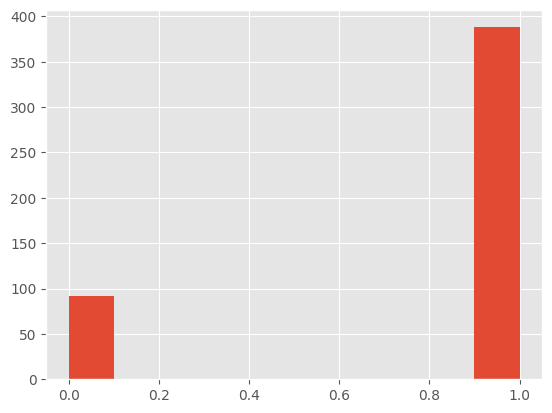

Rating:  shape: (9, 2)
┌────────────┬──────────┐
│ statistic  ┆ value    │
│ ---        ┆ ---      │
│ str        ┆ f64      │
╞════════════╪══════════╡
│ count      ┆ 480.0    │
│ null_count ┆ 0.0      │
│ mean       ┆ 4.197917 │
│ std        ┆ 1.092963 │
│ min        ┆ 1.0      │
│ 25%        ┆ 4.0      │
│ 50%        ┆ 5.0      │
│ 75%        ┆ 5.0      │
│ max        ┆ 5.0      │
└────────────┴──────────┘


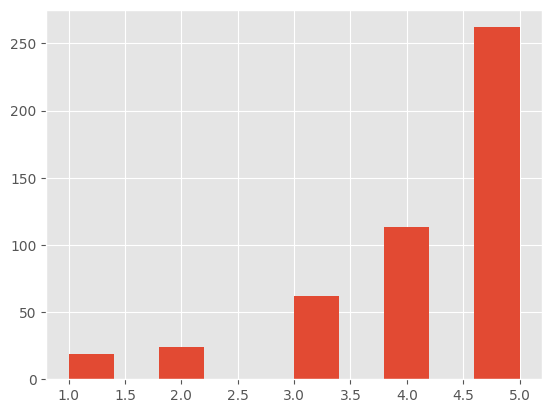

 *************************** 
Clthing ID:  [80]
Prompt:  ["Love this top! [TITLE] This top is one of my retailer faves! it is so comfortable and love the quality and design. i receive many compliments on this top. i usually wear an xs or s in retailer tops and the xs was a little tight in the arms. the dressing room attendant suggested ordering a petite small so i wouldn't lose the shape. so glad i did. it fits perfect! i even ordered when it was on sale!! the gray color is perfect! its not too thick or thin."]
labels:  [0]
Rating:  [5]
preds:  [0.9975177049636841]
Positive Feedback Count:  [2]
err:  [0.9975177049636841]
labels:  shape: (9, 2)
┌────────────┬──────────┐
│ statistic  ┆ value    │
│ ---        ┆ ---      │
│ str        ┆ f64      │
╞════════════╪══════════╡
│ count      ┆ 261.0    │
│ null_count ┆ 0.0      │
│ mean       ┆ 0.850575 │
│ std        ┆ 0.357192 │
│ min        ┆ 0.0      │
│ 25%        ┆ 1.0      │
│ 50%        ┆ 1.0      │
│ 75%        ┆ 1.0      │
│ max     

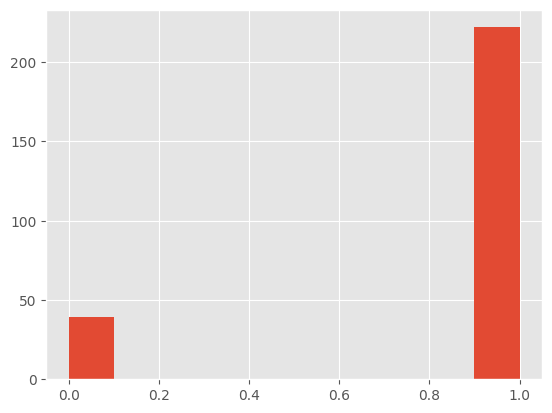

Rating:  shape: (9, 2)
┌────────────┬──────────┐
│ statistic  ┆ value    │
│ ---        ┆ ---      │
│ str        ┆ f64      │
╞════════════╪══════════╡
│ count      ┆ 261.0    │
│ null_count ┆ 0.0      │
│ mean       ┆ 4.287356 │
│ std        ┆ 0.971613 │
│ min        ┆ 1.0      │
│ 25%        ┆ 4.0      │
│ 50%        ┆ 5.0      │
│ 75%        ┆ 5.0      │
│ max        ┆ 5.0      │
└────────────┴──────────┘


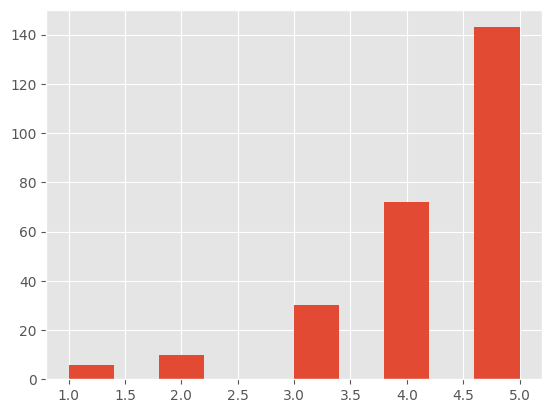

 *************************** 
Clthing ID:  [164]
Prompt:  [' [TITLE] I got this dress in the mail today and really thought i was going to love it. the color is a beautiful rich red, which was a nice surprise. i was expecting more of a dusty red from the picture. love the fabric - soft and appears to be good quality. the length is perfect - hit right at my knees (size small). the flow of the dress is great as well. the ultimate flaw would be the arm and neck holes. the neck hole was choking me but yet a little loose at the back of the neck - almost like it was on']
labels:  [0]
Rating:  [2]
preds:  [0.9974836707115173]
Positive Feedback Count:  [4]
err:  [0.9974836707115173]
labels:  shape: (9, 2)
┌────────────┬──────────┐
│ statistic  ┆ value    │
│ ---        ┆ ---      │
│ str        ┆ f64      │
╞════════════╪══════════╡
│ count      ┆ 268.0    │
│ null_count ┆ 0.0      │
│ mean       ┆ 0.873134 │
│ std        ┆ 0.333445 │
│ min        ┆ 0.0      │
│ 25%        ┆ 1.0      │
│ 50%   

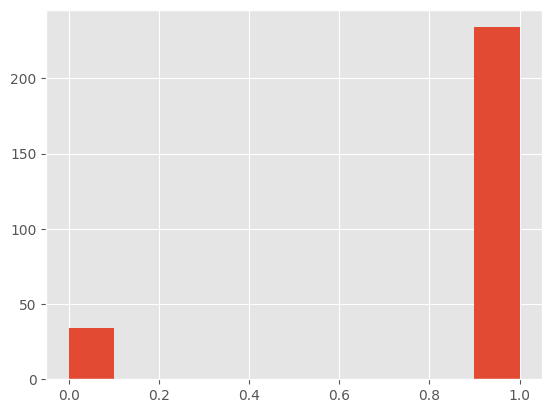

Rating:  shape: (9, 2)
┌────────────┬──────────┐
│ statistic  ┆ value    │
│ ---        ┆ ---      │
│ str        ┆ f64      │
╞════════════╪══════════╡
│ count      ┆ 268.0    │
│ null_count ┆ 0.0      │
│ mean       ┆ 4.384328 │
│ std        ┆ 0.970374 │
│ min        ┆ 1.0      │
│ 25%        ┆ 4.0      │
│ 50%        ┆ 5.0      │
│ 75%        ┆ 5.0      │
│ max        ┆ 5.0      │
└────────────┴──────────┘


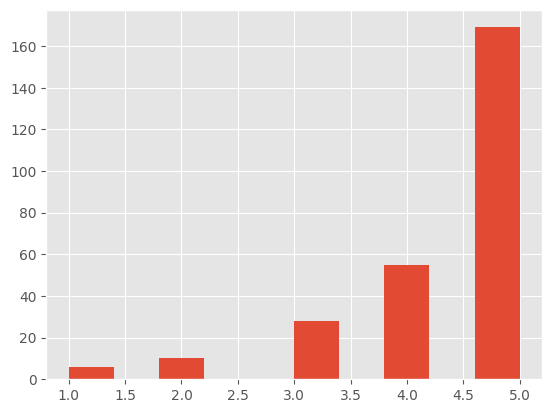

 *************************** 
Clthing ID:  [49]
Prompt:  ['Comfy [TITLE] This shirt is like the best worn in flannel with a little feminine flair! super soft and great length.']
labels:  [0]
Rating:  [5]
preds:  [0.9971990585327148]
Positive Feedback Count:  [1]
err:  [0.9971990585327148]
labels:  shape: (9, 2)
┌────────────┬──────────┐
│ statistic  ┆ value    │
│ ---        ┆ ---      │
│ str        ┆ f64      │
╞════════════╪══════════╡
│ count      ┆ 113.0    │
│ null_count ┆ 0.0      │
│ mean       ┆ 0.80531  │
│ std        ┆ 0.397726 │
│ min        ┆ 0.0      │
│ 25%        ┆ 1.0      │
│ 50%        ┆ 1.0      │
│ 75%        ┆ 1.0      │
│ max        ┆ 1.0      │
└────────────┴──────────┘


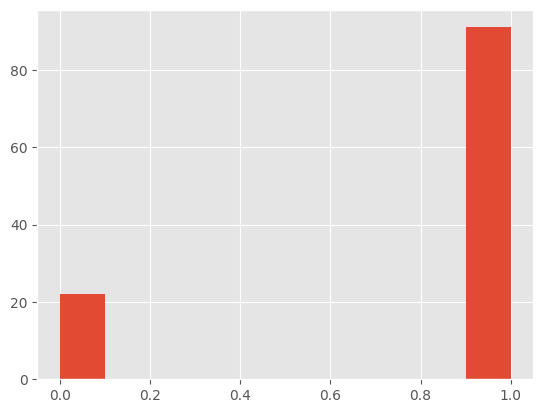

Rating:  shape: (9, 2)
┌────────────┬──────────┐
│ statistic  ┆ value    │
│ ---        ┆ ---      │
│ str        ┆ f64      │
╞════════════╪══════════╡
│ count      ┆ 113.0    │
│ null_count ┆ 0.0      │
│ mean       ┆ 4.300885 │
│ std        ┆ 0.998972 │
│ min        ┆ 1.0      │
│ 25%        ┆ 4.0      │
│ 50%        ┆ 5.0      │
│ 75%        ┆ 5.0      │
│ max        ┆ 5.0      │
└────────────┴──────────┘


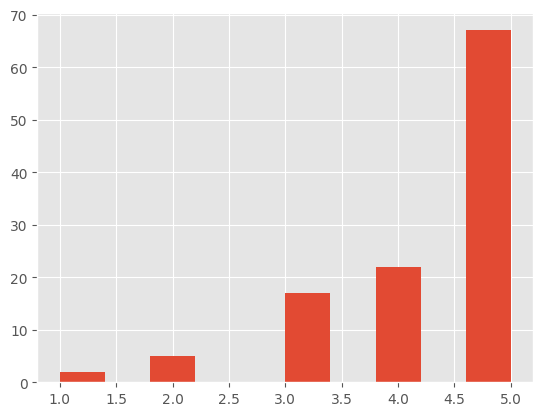

 *************************** 
Clthing ID:  [65]
Prompt:  ["Classic [TITLE] I tried this top on with a pair of white shorts, half tucked, and it looked really classy and nice. the fit was loose but flattering, it is a tiny bit sheer, but i was wearing a magenta bra, so perhaps i am biased. overall, i think this is a good basic addition, to a summer wardrobe, can be worn with a nice skirt, or with jeans as shown here. the 0 (or xs, can't remember) fit me at 115 lbs, with 30dd chest."]
labels:  [0]
Rating:  [4]
preds:  [0.9971103668212891]
Positive Feedback Count:  [4]
err:  [0.9971103668212891]
labels:  shape: (9, 2)
┌────────────┬──────────┐
│ statistic  ┆ value    │
│ ---        ┆ ---      │
│ str        ┆ f64      │
╞════════════╪══════════╡
│ count      ┆ 264.0    │
│ null_count ┆ 0.0      │
│ mean       ┆ 0.825758 │
│ std        ┆ 0.380038 │
│ min        ┆ 0.0      │
│ 25%        ┆ 1.0      │
│ 50%        ┆ 1.0      │
│ 75%        ┆ 1.0      │
│ max        ┆ 1.0      │
└────────────

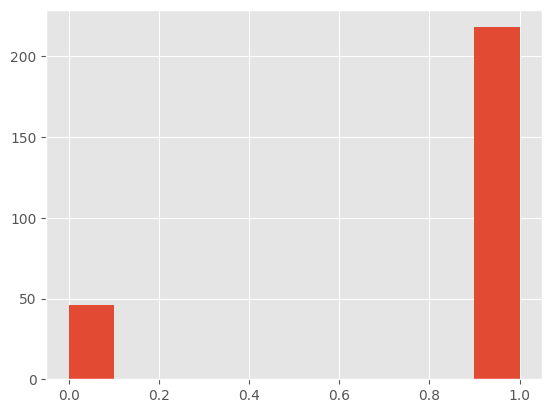

Rating:  shape: (9, 2)
┌────────────┬──────────┐
│ statistic  ┆ value    │
│ ---        ┆ ---      │
│ str        ┆ f64      │
╞════════════╪══════════╡
│ count      ┆ 264.0    │
│ null_count ┆ 0.0      │
│ mean       ┆ 4.151515 │
│ std        ┆ 1.089074 │
│ min        ┆ 1.0      │
│ 25%        ┆ 4.0      │
│ 50%        ┆ 5.0      │
│ 75%        ┆ 5.0      │
│ max        ┆ 5.0      │
└────────────┴──────────┘


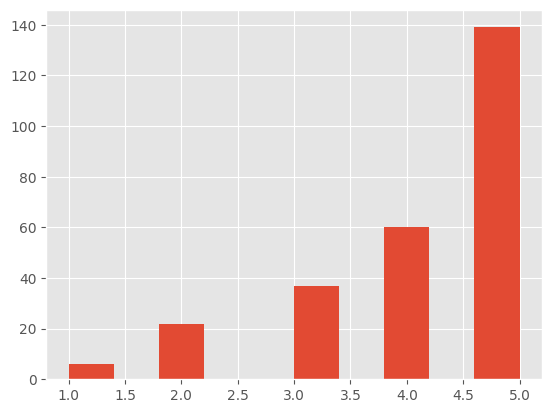

In [39]:
from pprint import pprint
for i in range(10):
    row = miss[i].to_dict(as_series=False)
    print(" *************************** ")
    print("Clthing ID: ", row["Clothing ID"])
    print("Prompt: ", row["prompt"])
    print("labels: ", row["labels"])
    print("Rating: ", row["Rating"])
    print("preds: ", row["preds"])
    print("Positive Feedback Count: ", row["Positive Feedback Count"])
    print("err: ", row["err"])
    oof_target = oof.filter(pl.col("Clothing ID") == miss[i, ["Clothing ID"]])
    print("labels: ", oof_target["labels"].describe())
    plt.hist(oof_target["labels"])
    plt.show()
    print("Rating: ", oof_target["Rating"].describe())
    plt.hist(oof_target["Rating"])
    plt.show()

In [43]:
oof_166 = oof.filter(pl.col("Clothing ID") == 166).sort("err", descending=True)
ipd.display(oof_166)

Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,prompt,labels,preds,folds,err
i64,i64,str,str,i64,i64,i64,str,i32,f64,f64,f64
166,67,"""Image does not do it justice""","""This is the cutest sweater. i …",5,0,16,"""Image does not do it justice […",0,0.999313,3.0,0.999313
166,51,"""Beautiful sweater, but...""","""""",3,0,0,"""Beautiful sweater, but... [TIT…",0,0.941654,2.0,0.941654
166,41,"""Why don't you look good on me,…","""This cardigan is so pretty on …",4,1,0,"""Why don't you look good on me,…",1,0.064949,3.0,0.935051
166,30,"""Sent to me damaged""","""I ordered the in the emerald g…",2,1,0,"""Sent to me damaged [TITLE] I o…",1,0.068289,1.0,0.931711
166,35,"""Nice shirt, wrong body type""","""This shirt is beautiful, howev…",3,1,0,"""Nice shirt, wrong body type [T…",1,0.07343,1.0,0.92657
166,71,"""Cute but short""","""I ordered the green, black and…",4,1,0,"""Cute but short [TITLE] I order…",1,0.122786,2.0,0.877214
166,58,"""Couldn't get past the itch fac…","""This is a beautiful tunic. i w…",3,1,1,"""Couldn't get past the itch fac…",1,0.146514,2.0,0.853486
166,51,"""""","""I love the looks of this sweat…",3,1,3,""" [TITLE] I love the looks of t…",1,0.182134,1.0,0.817866
166,53,"""Wished it fit""","""I really liked the fabric and …",3,1,1,"""Wished it fit [TITLE] I really…",1,0.231006,1.0,0.768994


In [42]:
import transformers

def tokenize(
    df: dict,
    tokenizer: transformers.PreTrainedTokenizer | transformers.PreTrainedTokenizerFast,
    max_length: int = 256,
    padding: str | bool = False,
    truncation: bool = True,
) -> transformers.BatchEncoding:
    return tokenizer(df["prompt"], truncation=truncation, max_length=max_length, padding=padding)

tokenizer = transformers.AutoTokenizer.from_pretrained("microsoft/deberta-v3-large")

/home/docker/.local/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/home/docker/.local/lib/python3.10/site-packages/transformers/convert_slow_tokenizer.py:551: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [45]:
encoded = tokenizer(oof_166["prompt"][0], truncation=True, max_length=256, padding=False,)
tokens = tokenizer.convert_ids_to_tokens(encoded.input_ids)
print(tokens)


['[CLS]', '▁Image', '▁does', '▁not', '▁do', '▁it', '▁justice', '▁[', 'TITLE', ']', '▁This', '▁is', '▁the', '▁cutest', '▁sweater', '.', '▁i', '▁bought', '▁it', '▁today', '▁in', '▁black', '.', '▁i', '▁cannot', '▁wait', '▁to', '▁wear', '▁it', '.', '▁it', '▁is', '▁a', '▁lovely', ',', '▁distinctive', '▁knit', '▁&', '▁just', '▁the', '▁right', '▁weight', '▁to', '▁layer', '▁as', '▁shown', '▁with', '▁a', '▁white', '▁blouse', '▁or', '▁with', '▁a', '▁turtleneck', '.', '▁i', '▁tried', '▁both', '▁the', '▁x', 's', '▁and', '▁s', ';', '▁and', '▁i', '▁decided', '▁to', '▁go', '▁with', '▁the', '▁s', '▁as', '▁it', '▁still', '▁emphasized', '▁that', '▁i', '▁have', '▁waist', ',', '▁but', '▁i', '▁could', '▁layer', '▁it', '▁nicely', '.', '▁i', '▁am', '▁5', "'", '4', '"', ',', '▁130', '▁lb', '.', '▁you', '▁can', '▁always', '▁count', '▁on', '▁angel', '▁of', '▁the', '▁north', '▁for', '▁great', '▁style', '.', '[SEP]']


Image does not do it justice [SEP] This is the cutest sweater. i bought it today in black. i cannot wait to wear it. it is a lovely, distinctive knit & just the right weight to layer as shown with a white blouse or with a turtleneck. i tried both the xs and s; and i decided to go with the s as it still emphasized that i have waist, but i could layer it nicely. i am 5'4", 130 lb. you can always count on angel of the north for great style.


In [49]:
exp_prompt = oof_166["prompt"][0].split("[TITLE]")[0] + "[SEP]" + oof_166["prompt"][0].split("[TITLE]")[1]
print(exp_prompt)
encoded = tokenizer(exp_prompt, truncation=True, max_length=256, padding=False,)
tokens = tokenizer.convert_ids_to_tokens(encoded.input_ids)
print(tokens)

Image does not do it justice [SEP] This is the cutest sweater. i bought it today in black. i cannot wait to wear it. it is a lovely, distinctive knit & just the right weight to layer as shown with a white blouse or with a turtleneck. i tried both the xs and s; and i decided to go with the s as it still emphasized that i have waist, but i could layer it nicely. i am 5'4", 130 lb. you can always count on angel of the north for great style.
['[CLS]', '▁Image', '▁does', '▁not', '▁do', '▁it', '▁justice', '[SEP]', '▁This', '▁is', '▁the', '▁cutest', '▁sweater', '.', '▁i', '▁bought', '▁it', '▁today', '▁in', '▁black', '.', '▁i', '▁cannot', '▁wait', '▁to', '▁wear', '▁it', '.', '▁it', '▁is', '▁a', '▁lovely', ',', '▁distinctive', '▁knit', '▁&', '▁just', '▁the', '▁right', '▁weight', '▁to', '▁layer', '▁as', '▁shown', '▁with', '▁a', '▁white', '▁blouse', '▁or', '▁with', '▁a', '▁turtleneck', '.', '▁i', '▁tried', '▁both', '▁the', '▁x', 's', '▁and', '▁s', ';', '▁and', '▁i', '▁decided', '▁to', '▁go', '▁wi

In [59]:
exp_prompt = "Title: " + oof_166["prompt"][0].split("[TITLE]")[0] + "[SEP]" + " Review Text:" + oof_166["prompt"][0].split("[TITLE]")[1]
print(exp_prompt)
encoded = tokenizer(exp_prompt, truncation=True, max_length=256, padding=False,)
tokens = tokenizer.convert_ids_to_tokens(encoded.input_ids)
print(tokens)

Title: Image does not do it justice [SEP] Review Text: This is the cutest sweater. i bought it today in black. i cannot wait to wear it. it is a lovely, distinctive knit & just the right weight to layer as shown with a white blouse or with a turtleneck. i tried both the xs and s; and i decided to go with the s as it still emphasized that i have waist, but i could layer it nicely. i am 5'4", 130 lb. you can always count on angel of the north for great style.
['[CLS]', '▁Title', ':', '▁Image', '▁does', '▁not', '▁do', '▁it', '▁justice', '[SEP]', '▁Review', '▁Text', ':', '▁This', '▁is', '▁the', '▁cutest', '▁sweater', '.', '▁i', '▁bought', '▁it', '▁today', '▁in', '▁black', '.', '▁i', '▁cannot', '▁wait', '▁to', '▁wear', '▁it', '.', '▁it', '▁is', '▁a', '▁lovely', ',', '▁distinctive', '▁knit', '▁&', '▁just', '▁the', '▁right', '▁weight', '▁to', '▁layer', '▁as', '▁shown', '▁with', '▁a', '▁white', '▁blouse', '▁or', '▁with', '▁a', '▁turtleneck', '.', '▁i', '▁tried', '▁both', '▁the', '▁x', 's', '▁a

In [64]:
founds = []
for i_oof in range(len(oof)):
    prompt = oof["prompt"][i_oof]
    if "\n" in prompt:
        print("Found, ", prompt)
        founds += [oof[i_oof]]
        break
    break

In [65]:
len(founds)

0